# Проектная работа "Анализ бизнес показателей"

# Описание проекта

Необходимо помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные сайта Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Афиши,
* выгрузка всех заказов за этот период,
* статистика рекламных расходов.

Необходимо изучить:
* как клиенты пользуются сервисом,
* когда делают первые покупки на сайте,
* сколько денег приносит компании каждый клиент,
* когда расходы на привлечение клиента окупаются.



## Шаг 1. Загрузим данные и подготовим их к анализу

### Положим данные о визитах, заказах и рекламных расходах в переменные;

In [1]:
#импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

In [2]:
#считаем данные и поожим в переменные
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')


In [3]:
#вывод информации 
for data in [visits, orders, costs]:
    data.columns= data.columns.str.lower() #перевод в нижний регистр
    display(data.info())
    display(data.head())
    display(data.describe())
    display('duplicates', data.duplicated().sum()) #проверка на дубликаты

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end ts       359400 non-null object
source id    359400 non-null int64
start ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,source id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


'duplicates'

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


'duplicates'

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


'duplicates'

0

<font size="4"> <strong>  Вывод </strong> </font>  

Как видно из данных (info) в таблицах нет пропущенных значений, а значит нет необходимости в заполнении данных или же дозапросе нехватающих данных.

Также проверка на дупликаты показала на их отсутствие.

С помощью describe можно посмотреть на "адекватность" данных. Можно заметить, что среди данных revenue есть нулевые значения.
Это возможно покупки которые были отменены, а значит никакой выручки от такой продажи не было.

Также стоит заметить, что даты имеют формат строки, что в дальнейших дейсвтиях нуждается корректировки 

desktop    262567
touch       96833
Name: device, dtype: int64

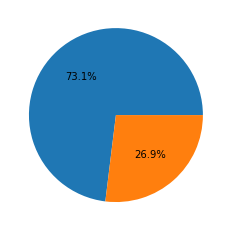

In [4]:
visits['device'] = visits['device'].astype('category')
display(visits['device'].value_counts())
plt.pie(visits['device'].value_counts(), autopct='%1.1f%%')
plt.show()

Данные переведены в тип category, и почситаны сколько всего сессиий приходится на каждый девайс. А именно с помощью ПК на сайт заходят в три раза больше, чем с телефона. А это возможно говорит о том, что с телефона (мобильная версия) мене удобнее покупать и искать информацию на сайте. Стоит обратить внимание


In [5]:
display('min_visits:', visits['start ts'].min(), 'max_visits:', visits['start ts'].max())
display('min_orders:', orders['buy ts'].min(), 'max_orders:', orders['buy ts'].max())
display('min_costs:', costs['dt'].min(), 'max_costs:', costs['dt'].max())


'min_visits:'

'2017-06-01 00:01:00'

'max_visits:'

'2018-05-31 23:59:00'

'min_orders:'

'2017-06-01 00:10:00'

'max_orders:'

'2018-06-01 00:02:00'

'min_costs:'

'2017-06-01'

'max_costs:'

'2018-05-31'

в заказах закрался июньский 2018 года показатель, а мы смотрим до конца маяю Дропнем эти данные.
В целом все остальные данные находятся внутри временных рамок

In [6]:
orders = orders[orders['buy ts'] != '2018-06-01 00:02:00']
#orders.sort_values('buy ts')


In [7]:
sources_pie = visits['source id'].value_counts().reset_index()
sources_pie

,index,source id
0,4,101794
1,3,85610
2,5,66905
3,2,47626
4,1,34121
5,9,13277
6,10,10025
7,7,36
8,6,6


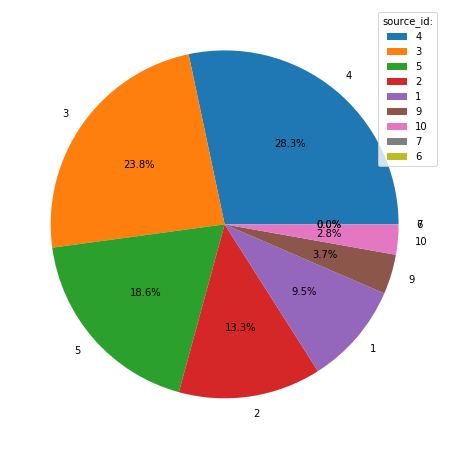

In [8]:
plt.figure(figsize=(8,8))
plt.pie(sources_pie['source id'], autopct='%1.1f%%', labels =sources_pie['index'])
plt.legend(title = "source_id:")
plt.show() 


Всего у нас 9 источников трафика. 
Самое большее число посещений, то есть сессий приходится на 3, 4, 5 сессии и в целом они занимают больше половины всех посещений 

### Подготовим данные. Убедимся, что тип данных во всех колонках соответствует сохранённым в них значениям.

Данный пункт будет проработан позднее в дальнейших шагах по мере необходимости

## Шаг 2. Рассчитаем метрики и построим графики
Посчитаем метрики трёх видов:
* продуктовые,
* метрики электронной коммерции,
* маркетинговые.

Отобразим на графиках изменения каждой метрики во времени. 

### Продуктовые метрики
* Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период.
* Определим, сколько раз за день пользователи в среднем заходят на сайт. 
* Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. 
* Рассчитаем Retention Rate, применяя когортный анализ. 

Первым делом необходимо поменять форматы датыю Напишем функцию, которая определить дату и переведет ее в нужный формат 

In [9]:
#функция для изменения формата 
def change_to_datetime (data):
    for column in data.columns:
        if 'ts' in column:
            data[column] = pd.to_datetime(data[column])
    return data
visits = change_to_datetime (visits)

#visits.info()

Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы месяц и неделю, а также полную дату.

In [10]:
#найдем дату начала недели для каждой даты столбца
visits['session_week'] = (pd.to_datetime(visits['start ts'], unit='d')\
- pd.to_timedelta(visits['start ts'].dt.dayofweek, unit='d')).dt.date 

#найдем дату начала меясца для каждой даты столбца (можно и по-другому, что я  и делала ниже)
visits['session_month'] = (pd.to_datetime(visits['start ts'], unit='d')\
- pd.to_timedelta(visits['start ts'].dt.day, unit='d') + pd.to_timedelta('1 day')).dt.date

#найдем дату=день
visits['session_date'] = visits['start ts'].dt.date
#visits.head()

Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее

In [11]:
dau = visits.groupby('session_date').agg({'uid':'nunique'})
wau = visits.groupby('session_week').agg({'uid':'nunique'})
mau = visits.groupby('session_month').agg({'uid':'nunique'})

def uniq_users(session, name):
    display(name, visits.groupby(session).agg({'uid':'nunique'}).mean().round().astype('int'))

dau_mean = uniq_users('session_date', 'DAU=')
wau_mean = uniq_users('session_week', 'WAU=')
mau_mean = uniq_users('session_month', 'MAU=')

'DAU='

uid    908
dtype: int64

'WAU='

uid    5716
dtype: int64

'MAU='

uid    23228
dtype: int64

In [12]:
#функция для построения график во времени
def in_time(data, label, ylabel):
    ax = data.plot(grid = True, figsize = (40,15), linewidth=3,  color='black', legend = False)
    ax.set_xlabel("Период", fontsize=40, labelpad=10)
    ax.set_ylabel(ylabel, fontsize=40, labelpad=10)
    ax.set_title(label, fontsize=50)
    plt.tick_params(axis='both', labelsize=25)
    plt.xticks(rotation=90)
    plt.show()



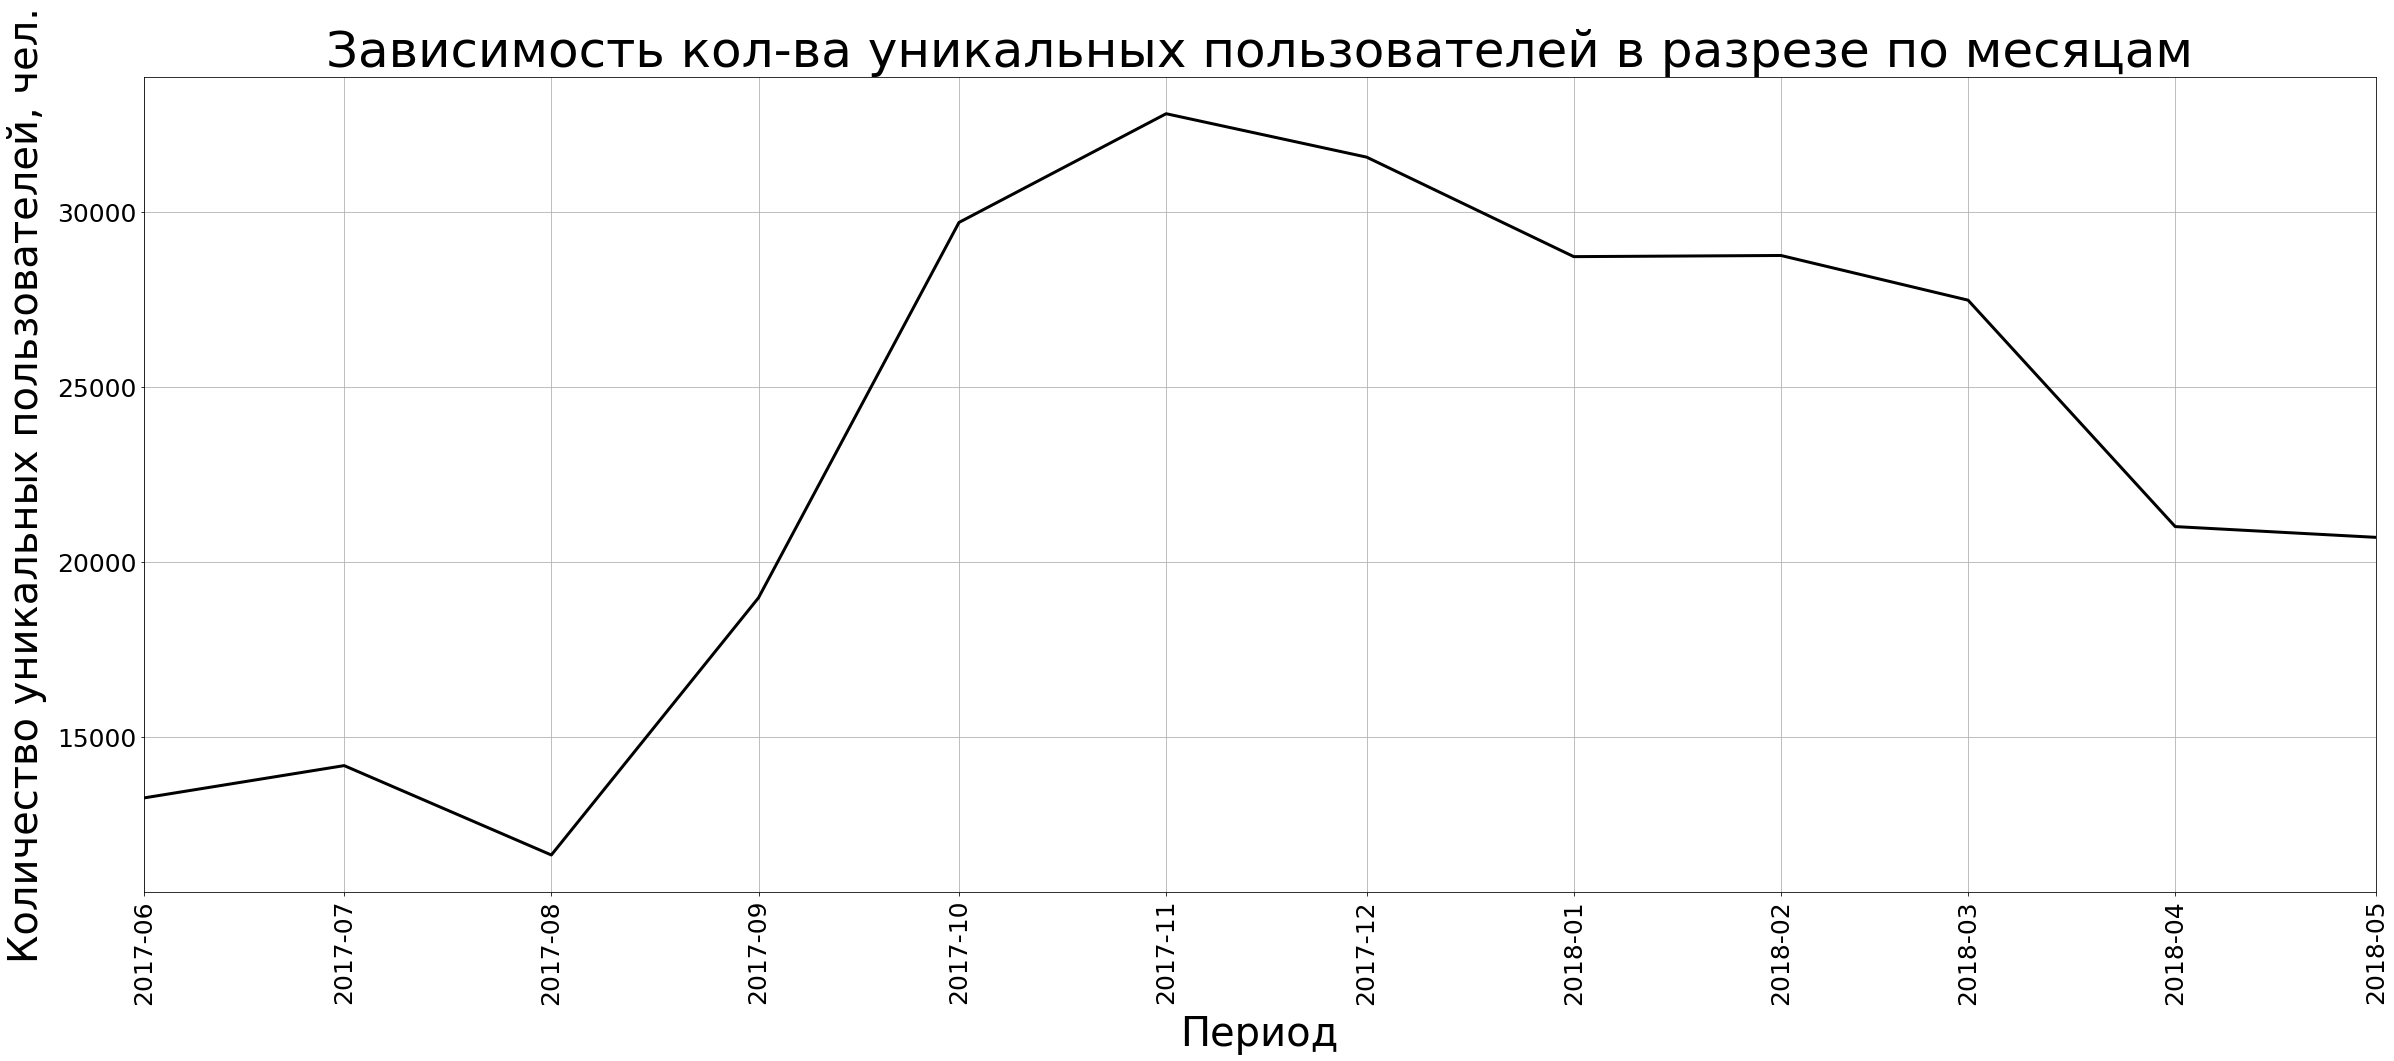

In [13]:
in_time(mau, 'Зависимость кол-ва уникальных пользователей в разрезе по месяцам', "Количество уникальных пользователей, чел.")

Данный график говорит о сезонности посещения клиентами  Афиши. Большее количество уникальных пользователей наблюдается с осени по весну, а именно с октября по апрель. Возможно это связано с тем, что в теплое время года люди больше гуляют, а вот в холодные зимние вечера предпочитают сидеть в теплых местах, напрмер, сходить на концерт, в театр и тд. 

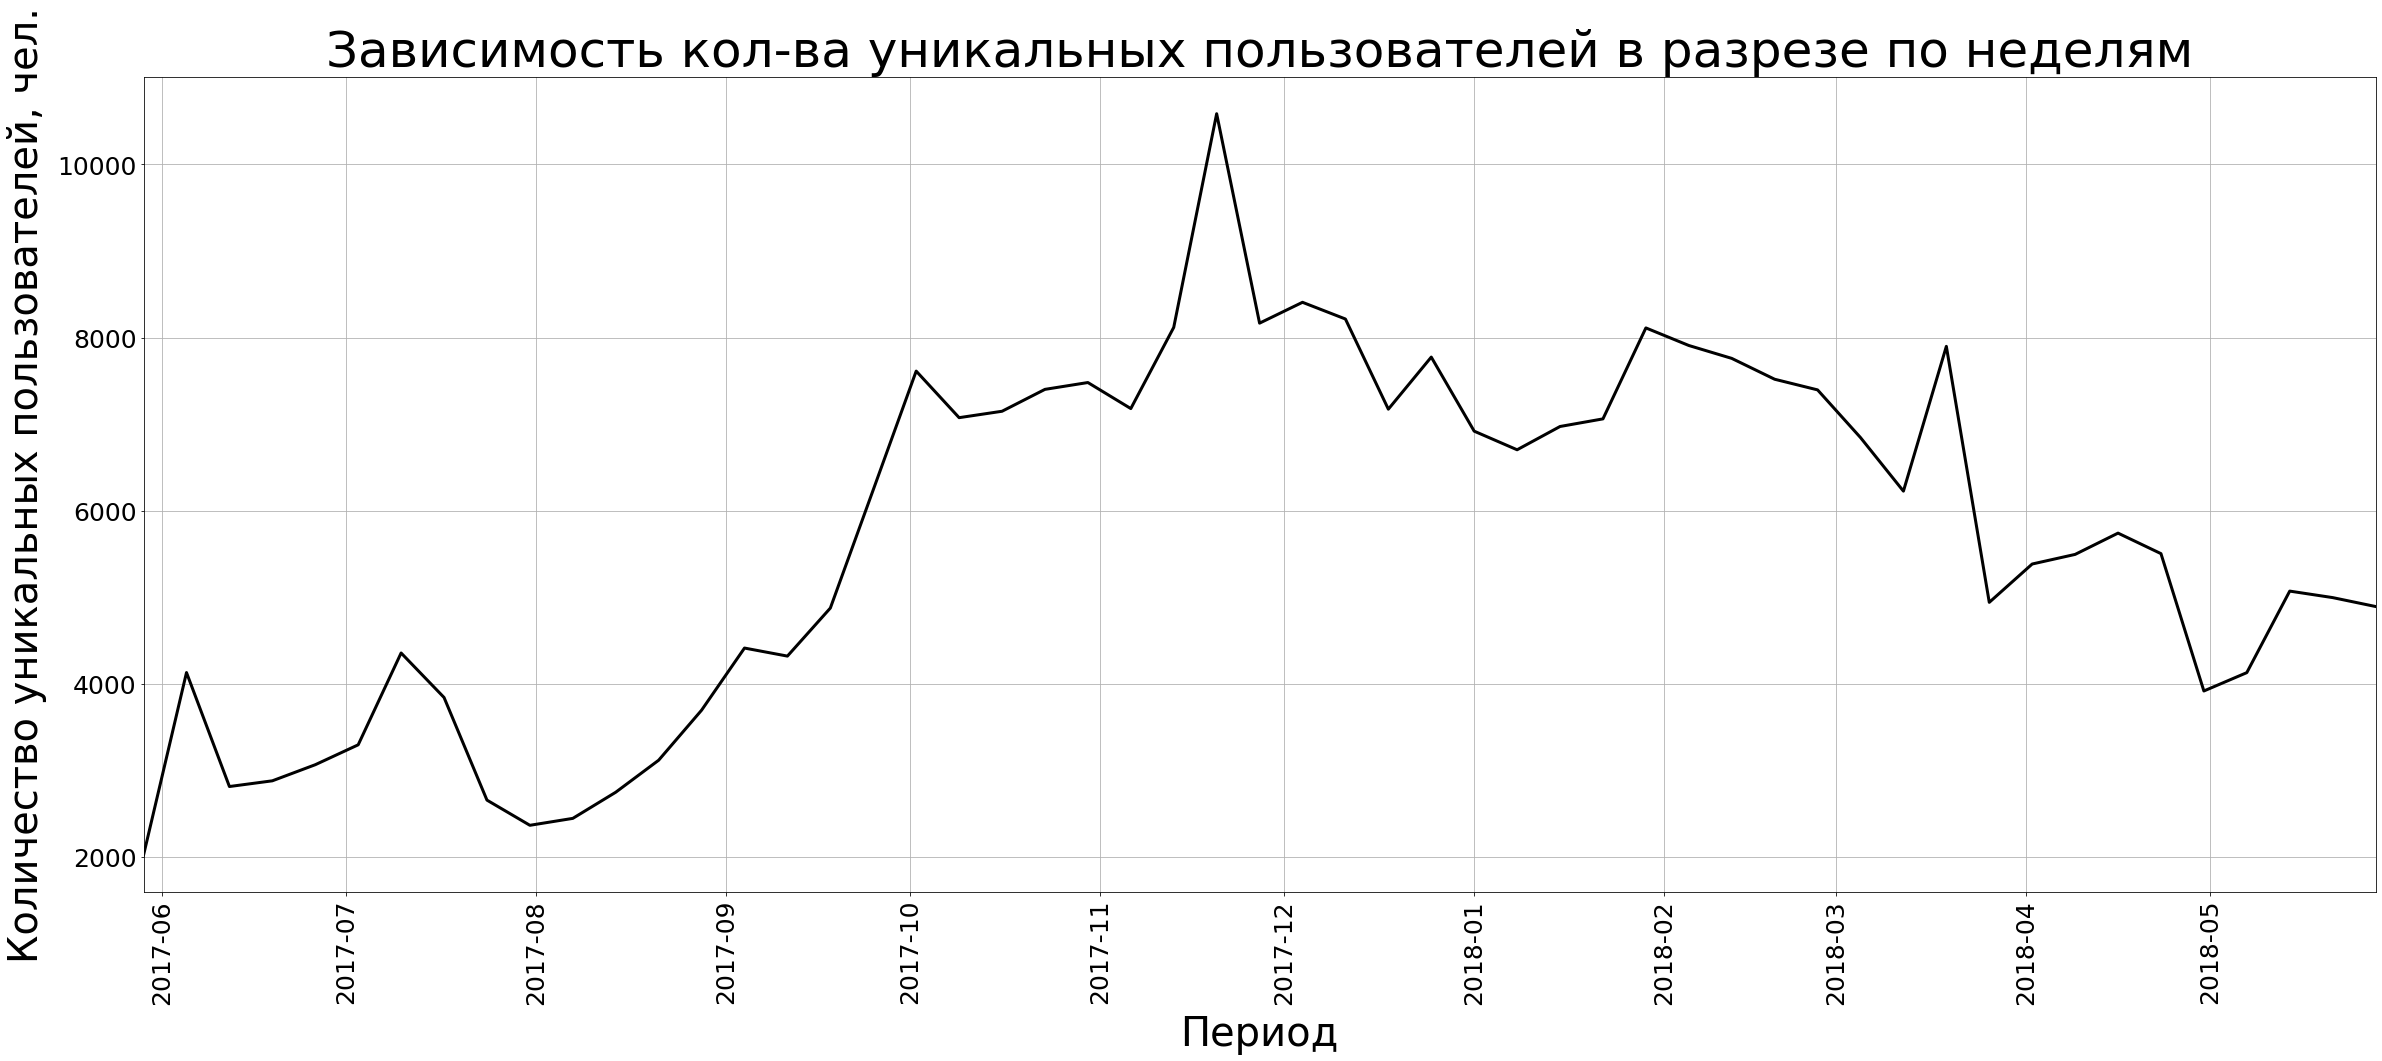

In [14]:
in_time(wau, 'Зависимость кол-ва уникальных пользователей в разрезе по неделям', "Количество уникальных пользователей, чел.")

Изучая этот график можно сказать, что характер распределения ко-ва пользовтелей по всему периоду, идентичен если рассмтаривать в разрезе недель. В течение меясца (1-4 недели) график ведет себя неоднозначно, то есть проследить зависимость от номера недели в месяце не удается, значит никакого распредения в этом случае уследить не удастся. 

Но стоит заметить что пиковое посеение сайта было ближе к Новому году, после середины ноябряю Возможно это связано с новогодними представлениями, вечерами и тд , время когда концентрация развлечений становится больше. 

Активный рост от недели к неделе идет после июля-начала августа, после чего опять начинает снижатся  после второй половины марта.

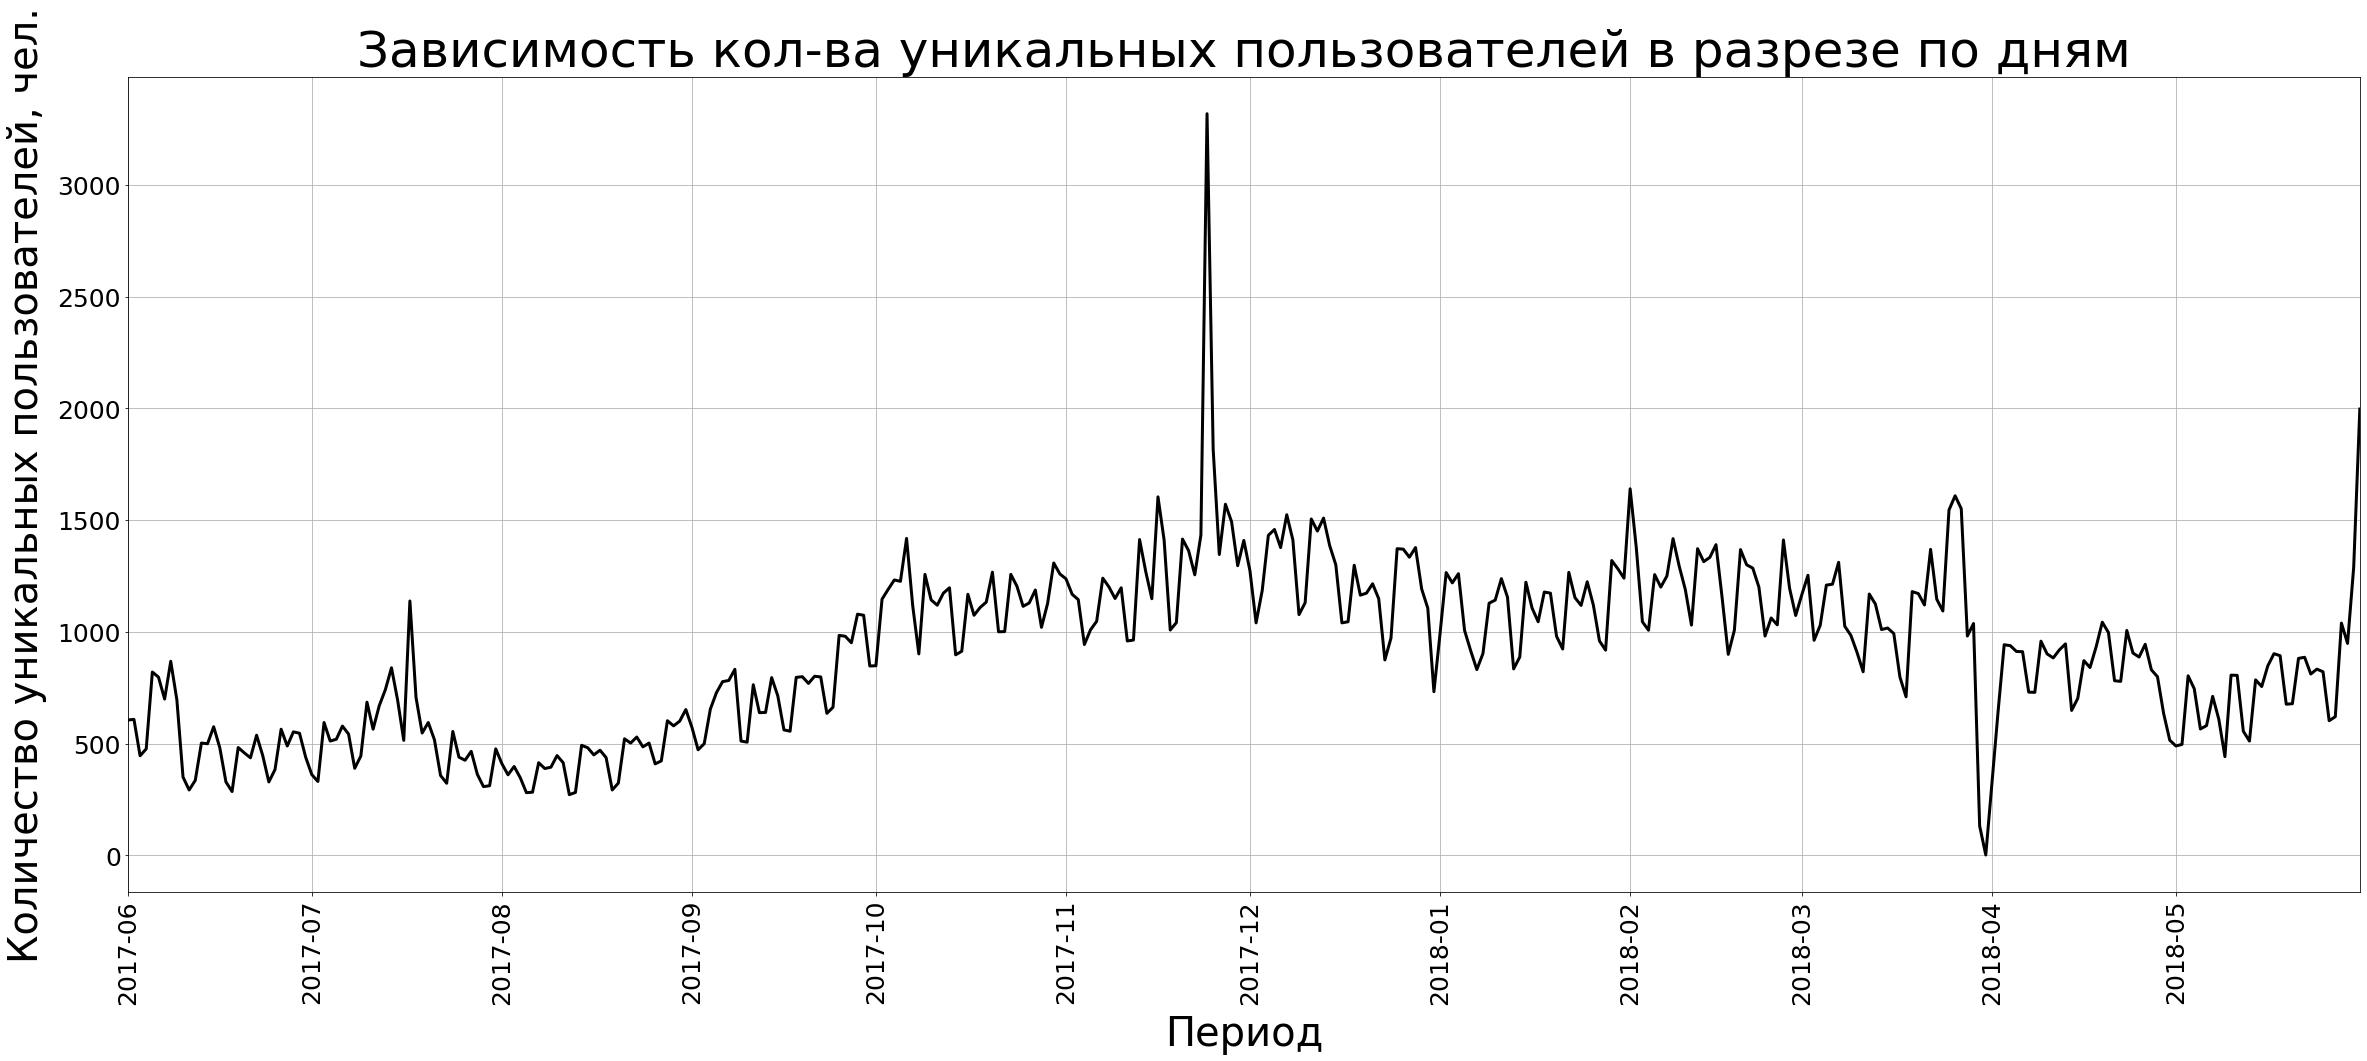

In [15]:
in_time(dau, 'Зависимость кол-ва уникальных пользователей в разрезе по дням', "Количество уникальных пользователей, чел.")

Здесь можно заметить по 4-5 пиков для каждого месяца, а значит это недели.

По этому графику можно понять в какой день недели люди обычно заходят на сайт. Пики приходятся на начло недели, а вот "ямы" это конец недели. Это и логично, обычно люди ходят куда-либо по выходным, а билеты смотрят заранее (к примеру в начале недели) поэтому и получаются такие пики.

In [16]:
visits_uid_count = visits.groupby(['session_date']).agg({'start ts':'count'})
visits_uid_nuniq = visits.groupby(['session_date']).agg({'uid':'nunique'})

visits_uid_mean = visits_uid_nuniq.join(visits_uid_count, on='session_date').reset_index()
visits_uid_mean['session_per_uid'] = visits_uid_mean['start ts']/visits_uid_mean['uid']

print('за день пользователи в среднем заходят на сайт {}'.format(visits_uid_mean['session_per_uid'].mean().round(2)))

за день пользователи в среднем заходят на сайт 1.08


В среднем кол-во посещений пользователеями сайта Афиша составляет 1.08 раз, что можно наблюдать и на грфике ниже. 

Заметим, что кол-во уникальных пользователей и кол-во посещений в разрезе по дням ведут себя почти одинково, так как каждый пользовтель на день заходит примерно 1.08 раз, то есть это и является и уникальным пользователем. 

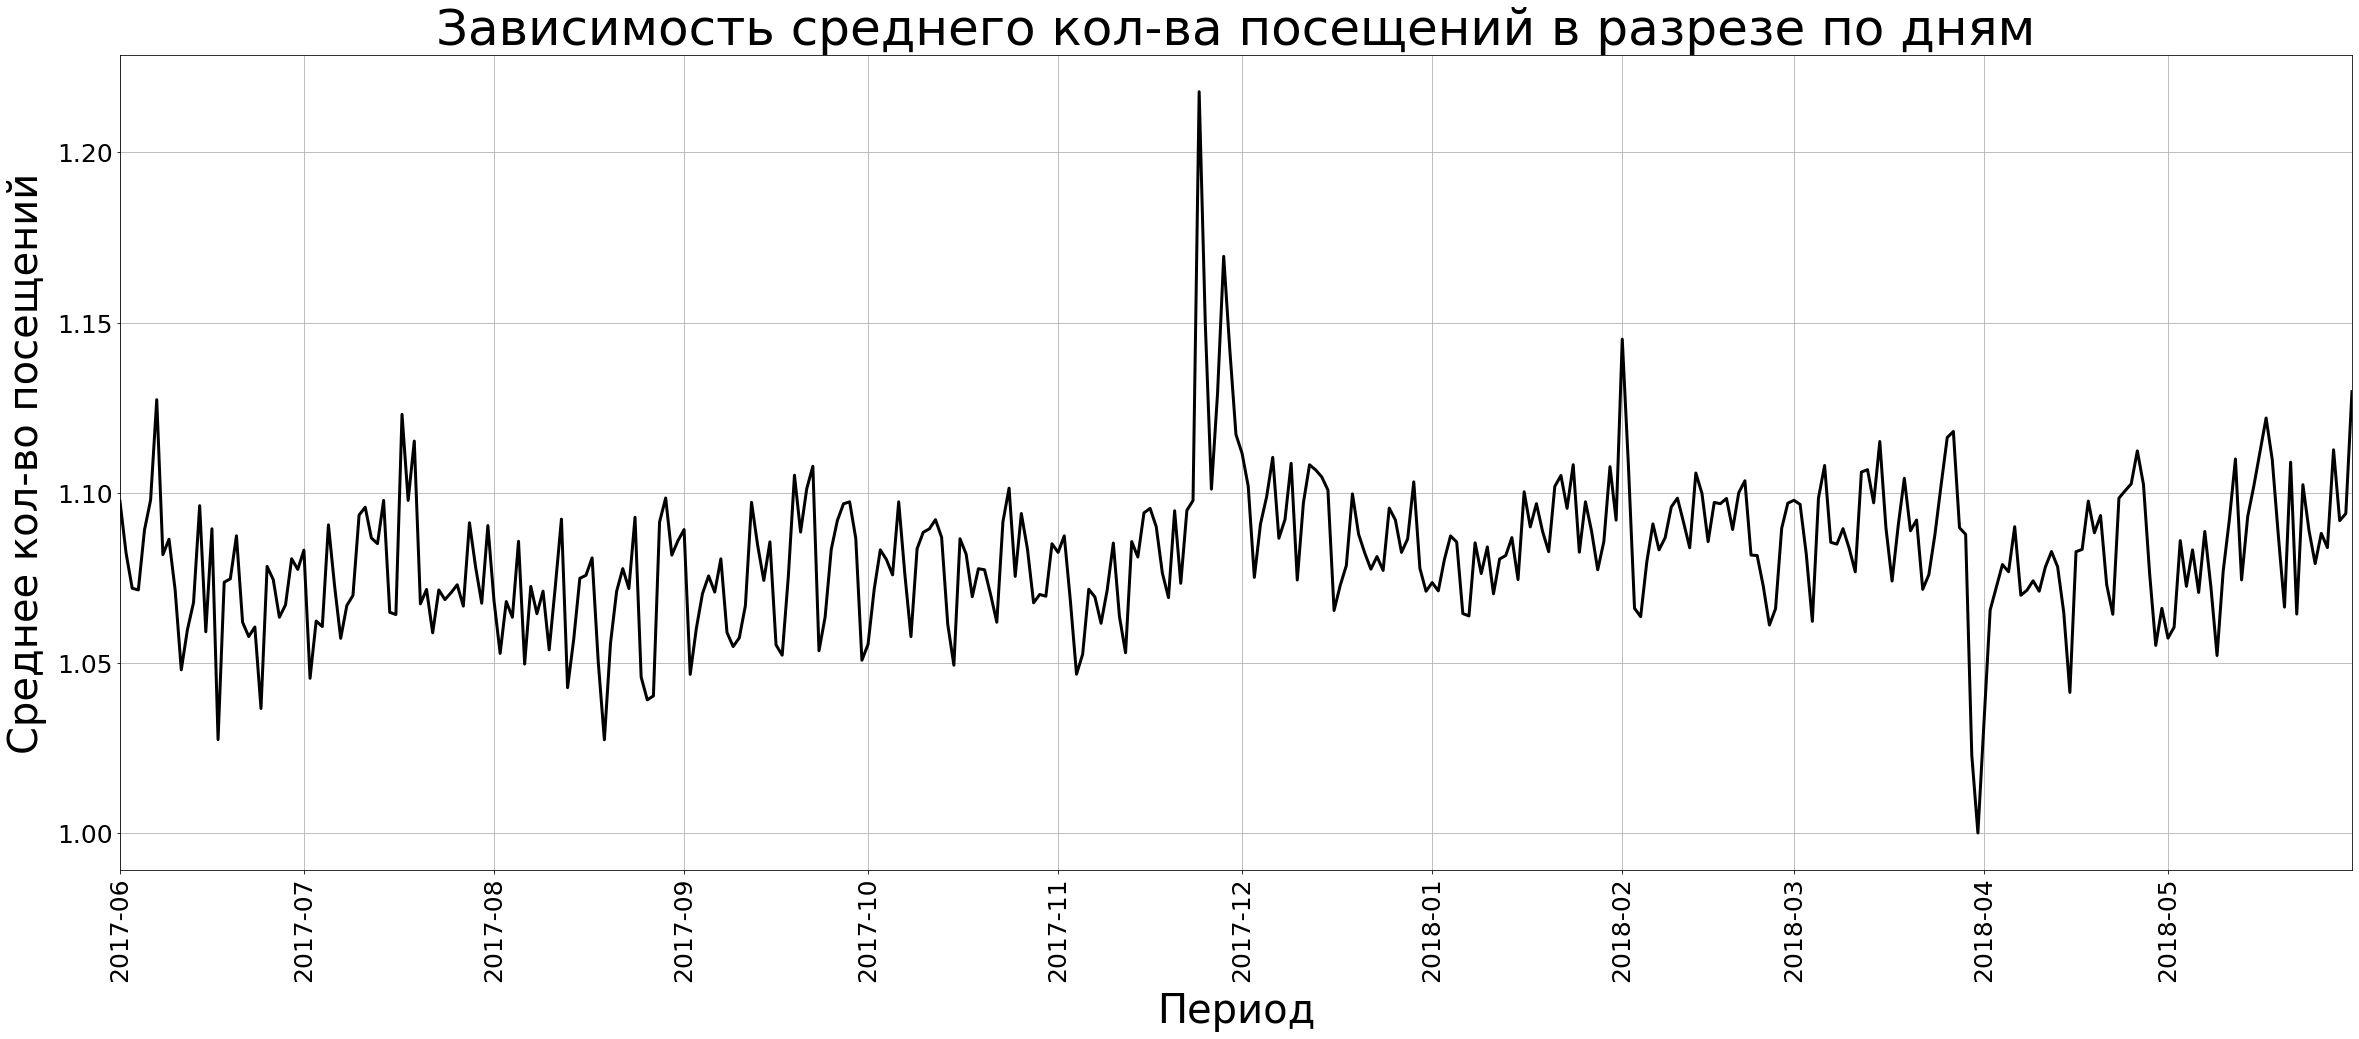

In [17]:
in_time(visits_uid_mean.groupby('session_date').agg({'session_per_uid':'mean'}), \
        'Зависимость среднего кол-ва посещений в разрезе по дням',\
        "Среднее кол-во посещений")


In [18]:
diff_visits_uid = visits_uid_mean['session_per_uid'].max()\
- visits_uid_mean['session_per_uid'].min()

print('На {} посещений меняется метрика в течение года'.format(diff_visits_uid.round(3)))

На 0.218 посещений меняется метрика в течение года


0.218 посещений это очень маленькая разница, то есть метрика меняется не сильно, держится стабильно втечении года.

In [19]:
sticky_mau = (visits.groupby('session_date').agg({'uid':'nunique'}).mean() / 
              visits.groupby('session_month').agg({'uid':'nunique'}).mean()) *100
sticky_wau = (visits.groupby('session_date').agg({'uid':'nunique'}).mean() / 
              visits.groupby('session_week').agg({'uid':'nunique'}).mean()) *100

print('Sticky Factor за неделю {} '.format(sticky_wau.round(2)))
print('Sticky Factor за месяц {} '.format(sticky_mau.round(2)))

Sticky Factor за неделю uid    15.88
dtype: float64 
Sticky Factor за месяц uid    3.91
dtype: float64 


Sticky Factor - регулярность использования сайта — то, как часто пользователи к нему обращаются.
За неделю вовлеченность аудитории больше, чем за месяц примерно в три раза. Хороший sticky factor будет выше 20-25%.
У нас достаточно маленькое зачение а значит повысить регулярность использования сайта


In [20]:
visits_uid_mean.groupby('session_date').agg({'session_per_uid':'mean'}).idxmax()
#hogwarts_points.groupby('faculty_name')['points'].sum().idxmax()) 

session_per_uid    2017-11-24
dtype: object

Анамольно высокое значение скорее всего связано с тем, что приближались новогодние выходные, и билеты покупать приходится заранее. Тем более этот день - пятница. После работы люди скорее всего решили проверить сайт


In [21]:
visits_uid_mean.groupby('session_date').agg({'session_per_uid':'mean'}).idxmin()

session_per_uid    2018-03-31
dtype: object

этот день суббота, неободимые билеты уже куплены (пора школьных каникул, скорее всег люди так же берут отпуска и едут отдызать а не ходят в театры к примеру )


Посчитаем длительнось каждой сессии, проведенной на сайте Афиши. Для этого вычтем из конца сессии время начала сесси и переведем в формат секунд.

In [22]:
#продолжительность сессии
visits['session_duration_sec'] = (
    visits['end ts'] - visits['start ts']).dt.seconds
#visits[visits['session_duration_sec']==0].count()

Однако взглянем на распределение:

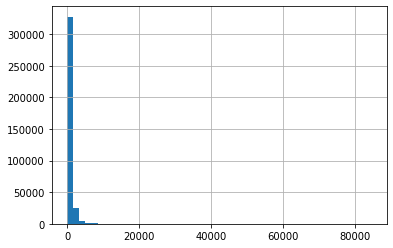

In [23]:
visits['session_duration_sec'].hist(bins=50) 

Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. Наше — не из таких, рассчитаем моду (значение в выборке, которое встречается чаще всего):

In [24]:
session_duration = visits['session_duration_sec'].mode()
display('типичная пользовательская сессия,c = ')
session_duration

'типичная пользовательская сессия,c = '

0    60
dtype: int64

60 секунд за сессию это совсем малый промежуток времени. Хорошо если пользователь успевает за это время приобрести заказ. А есл нет, то стоит пересмотреть версии, что мешали бы продолжительсти сессии. Возможно это связано с тем, что на маленьких размеров девайсах (смартфоны или планшеты) неудобно смотреть сайт Афиши.


Рассчитаем Retention Rate
**Retention Rate** показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.
Чем дольше привлечённый пользователь пользуется продуктом, тем выше потенциальная выручка. 

In [25]:
#дату, когда пользователь впервые проявил активность 
first_activity_date = visits.groupby('uid')['start ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on='uid')
#visits

In [26]:
#месяц, когда пользователь впервые проявил активность 
visits['first_activity_month'] = (pd.to_datetime(visits['first_activity_date'], unit='d')\
- pd.to_timedelta(visits['first_activity_date'].dt.day, unit='d') + pd.to_timedelta('1 day')).dt.date

#Время жизни когорты
visits['cohort_lifetime'] = (visits['session_month'] -
                                   visits['first_activity_month'])
#перевод в месяц
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int') 

In [27]:
#Сгруппируем данные по когорте и lifetime. 
#Посчитаем для каждой когорты количество активных пользователей на определённую «неделю жизни»: 
cohorts = visits.groupby(['first_activity_month', 'cohort_lifetime'])\
          .agg({'uid':'nunique'}).reset_index() 

In [28]:
#исходное количество пользователей в когорте
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

cohorts = cohorts.merge(initial_users_count, on= 'first_activity_month')

In [29]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 
retention_pivot = (cohorts.pivot_table(index='first_activity_month',
                                     columns = 'cohort_lifetime',
                                     values = 'retention',
                                     aggfunc = 'sum').drop(0, axis=1))
retention_pivot

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,
2017-06-01,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


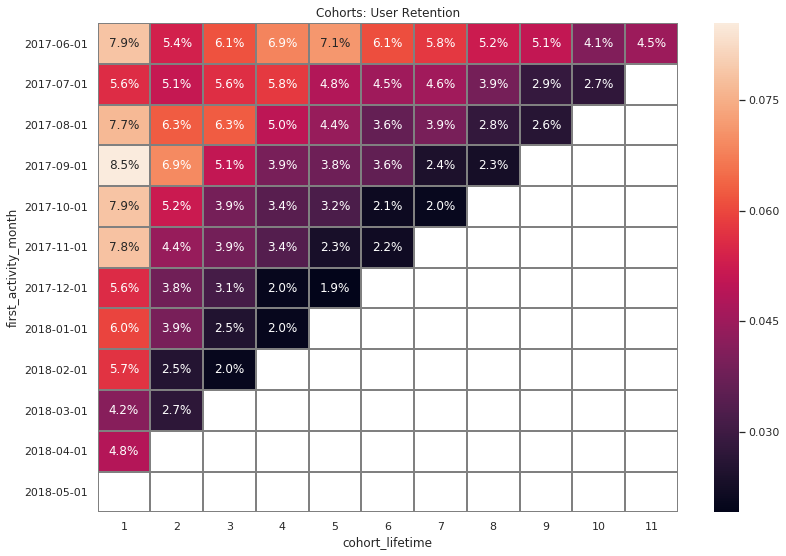

In [30]:
#тепловая карта сводной таблицы по retetion rate
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.show()

In [31]:
display('средний Retention Rate на второй месяц «жизни» когорт: {:.3%}'.format(retention_pivot[1].mean()))

'средний Retention Rate на второй месяц «жизни» когорт: 6.517%'

Retention Rate в первый месяц убывает по когортам с течением времени. Если для когорты пользователей, пришедших в июне Retention Rate в первый месяц составляет 7,9%, то для пользователей, пришедших в апреде 2018 г. — уже 4,8%. 

Так, за 10 мес. коэффициент удержания упал на 3,1%. Это говорит, что с каждой новой когортой поведение покупателей меняется. Возможно, ухудшилось качество работы сайта, или же удобство заказа, а может быть стало больше действий при заказе.

Заметим, что коэффициент удержания резко снижается по сравнению в первым месяцем, составляет всего лишь 6,5% Значит необходимо принять меры по удержанию пользовтелей, чтобы не происходил оттокю Возможно стоит рассмотреть различного вида маркетинговые шаги, по удержанию так и по привлечению клиентов. Создать опрос, что не устраивает клиента (к примеру).


### Метрики электронной коммерции

* Узнаем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. 
* Применяя когортный анализ или другой метод, рассчитаем среднее количество покупок на одного покупателя за определённый период. 
* Рассчитаем средний чек, применяя группировку по времени совершения покупки. 
* Выясним, как меняется LTV на покупателя по когортам. 

In [32]:
orders = change_to_datetime (orders) #выов функции изменения формата даты
first_order_date = orders.groupby('uid')['buy ts'].min() #находим первую дату покупки 
first_order_date.name = 'first_order_date'
first_order_date = first_order_date.reset_index()

In [33]:
first_order = first_order_date.merge(first_activity_date, on='uid')
first_order = first_order[first_order['first_order_date'] != first_order['first_activity_date']]


Стоит заметить, время покупки и время первй активности окрулены до минуты, что тоже может сказаться на данных. Но так как мы будем изучать в резерезе дня, то это не столь важно

Text(0.5, 1.0, 'Количество покупателей и время до совершения покупки ')

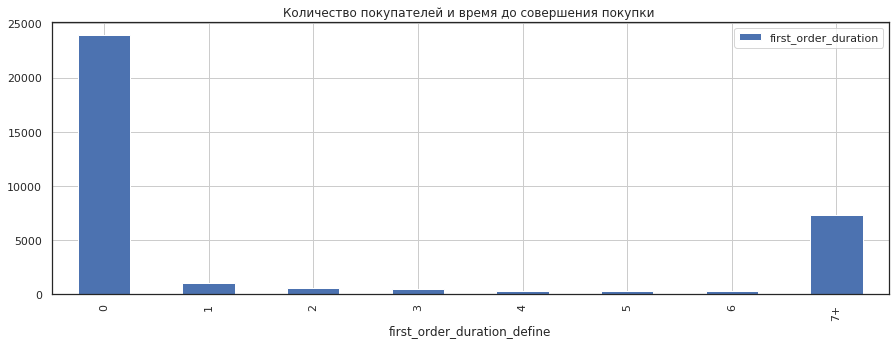

In [34]:
#время потраченное до первой покупки
first_order['first_order_duration'] = (
    first_order['first_order_date'] - first_order['first_activity_date']).dt.days
#функция для категоризации по дням
def order_duration(duration):
    if duration >= 7:
        return '7+'
    return duration
first_order['first_order_duration_define'] = first_order['first_order_duration'].apply(order_duration)

first_order_group = first_order.groupby('first_order_duration_define').agg({'first_order_duration':'count'})
first_order_group.plot(kind='bar', figsize=(15,5), grid=True)
plt.title('Количество покупателей и время до совершения покупки ')

In [35]:
first_order['first_order_duration'].mode()
#first_order[first_order['first_order_duration'] == 0].count()

0    0
dtype: int64

Как видно из графика, самое большое кол-во пользовтелей совершают покупку в течение первого дня (0 день).
То есть пользовтаели находят, что ищут и сразу же покупают, что есть хорошо.

не берем в расчет данные когда время покупки совпадает с временем первой активности (скорее всего это является багом, но таких данных не много, и их удалили)

Рассчитаем среднее количество покупок на одного покупателя за определённый период: за 6 месяцев. 

In [36]:
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')


In [37]:
first_order_date = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_order_date.columns = ['uid', 'first_order_month']
#first_order_date

In [38]:
cohort_sizes_mean_buy = (
    first_order_date.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes_mean_buy.columns = ['first_order_month', 'n_buyers']

orders_mean_buy = pd.merge(orders,first_order_date, on='uid')

In [39]:
#Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и посчитаем выручку. 
cohorts_mean_buy = (
    orders_mean_buy.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'count'})
    .reset_index()
)

report_mean_buy  = pd.merge(cohort_sizes_mean_buy, cohorts_mean_buy, on='first_order_month')


In [40]:
#возраст когорты
report_mean_buy['cohort_lifetime'] = (report_mean_buy['order_month'] -
                                   report_mean_buy['first_order_month'])

report_mean_buy['cohort_lifetime'] = report_mean_buy['cohort_lifetime'] / np.timedelta64(1, 'M')
report_mean_buy['cohort_lifetime'] = report_mean_buy['cohort_lifetime'].round().astype('int') 


In [41]:
report_mean_buy['order_per_uid'] = (report_mean_buy['revenue']/report_mean_buy['n_buyers'])
report_mean_buy = report_mean_buy[report_mean_buy['cohort_lifetime'] < 6]

report_mean_buy
output_mean_buy = report_mean_buy.pivot_table(
    index='first_order_month', columns='cohort_lifetime', values='order_per_uid', aggfunc='mean'
)

output_mean_buy.fillna('') 


cohort_lifetime,0,1,2,3,4,5
first_order_month,,,,,,
2017-06-01,1.163618,0.0874938,0.0860109,0.111715,0.14434,0.107761
2017-07-01,1.136765,0.0520021,0.0624025,0.0540822,0.0374415,0.0426417
2017-08-01,1.118978,0.0788321,0.0729927,0.0591241,0.0620438,0.0452555
2017-09-01,1.136381,0.0848508,0.0623789,0.0635413,0.0259589,0.0422317
2017-10-01,1.143779,0.0723502,0.0373272,0.0281106,0.0297235,0.0237327
2017-11-01,1.179368,0.0972801,0.0445969,0.051703,0.0333252,0.0144572
2017-12-01,1.152635,0.0616016,0.0460872,0.0408396,0.0196213,0.0239562
2018-01-01,1.121554,0.0664097,0.047139,0.0189742,0.0231248,
2018-02-01,1.121611,0.0608053,0.0227335,0.0191728,,


In [42]:
print('Среднее количество покупок на одного покупателя за 6 период: {}'\
      .format(output_mean_buy.cumsum(axis=1)[5].mean().round(2)))

Среднее количество покупок на одного покупателя за 6 период: 1.43


Среднее количество покупок на одного покупателя за 6 месяцев = 1,43 покупок

Рассчитаем средний чек и изменение показателя во времени

In [44]:
mean_revenue = orders.groupby('order_month').agg({'revenue':'mean'})
print('Cредний чек: {} y.e.'.format(round(orders['revenue'].mean(), 2)))

Cредний чек: 5.0 y.e.


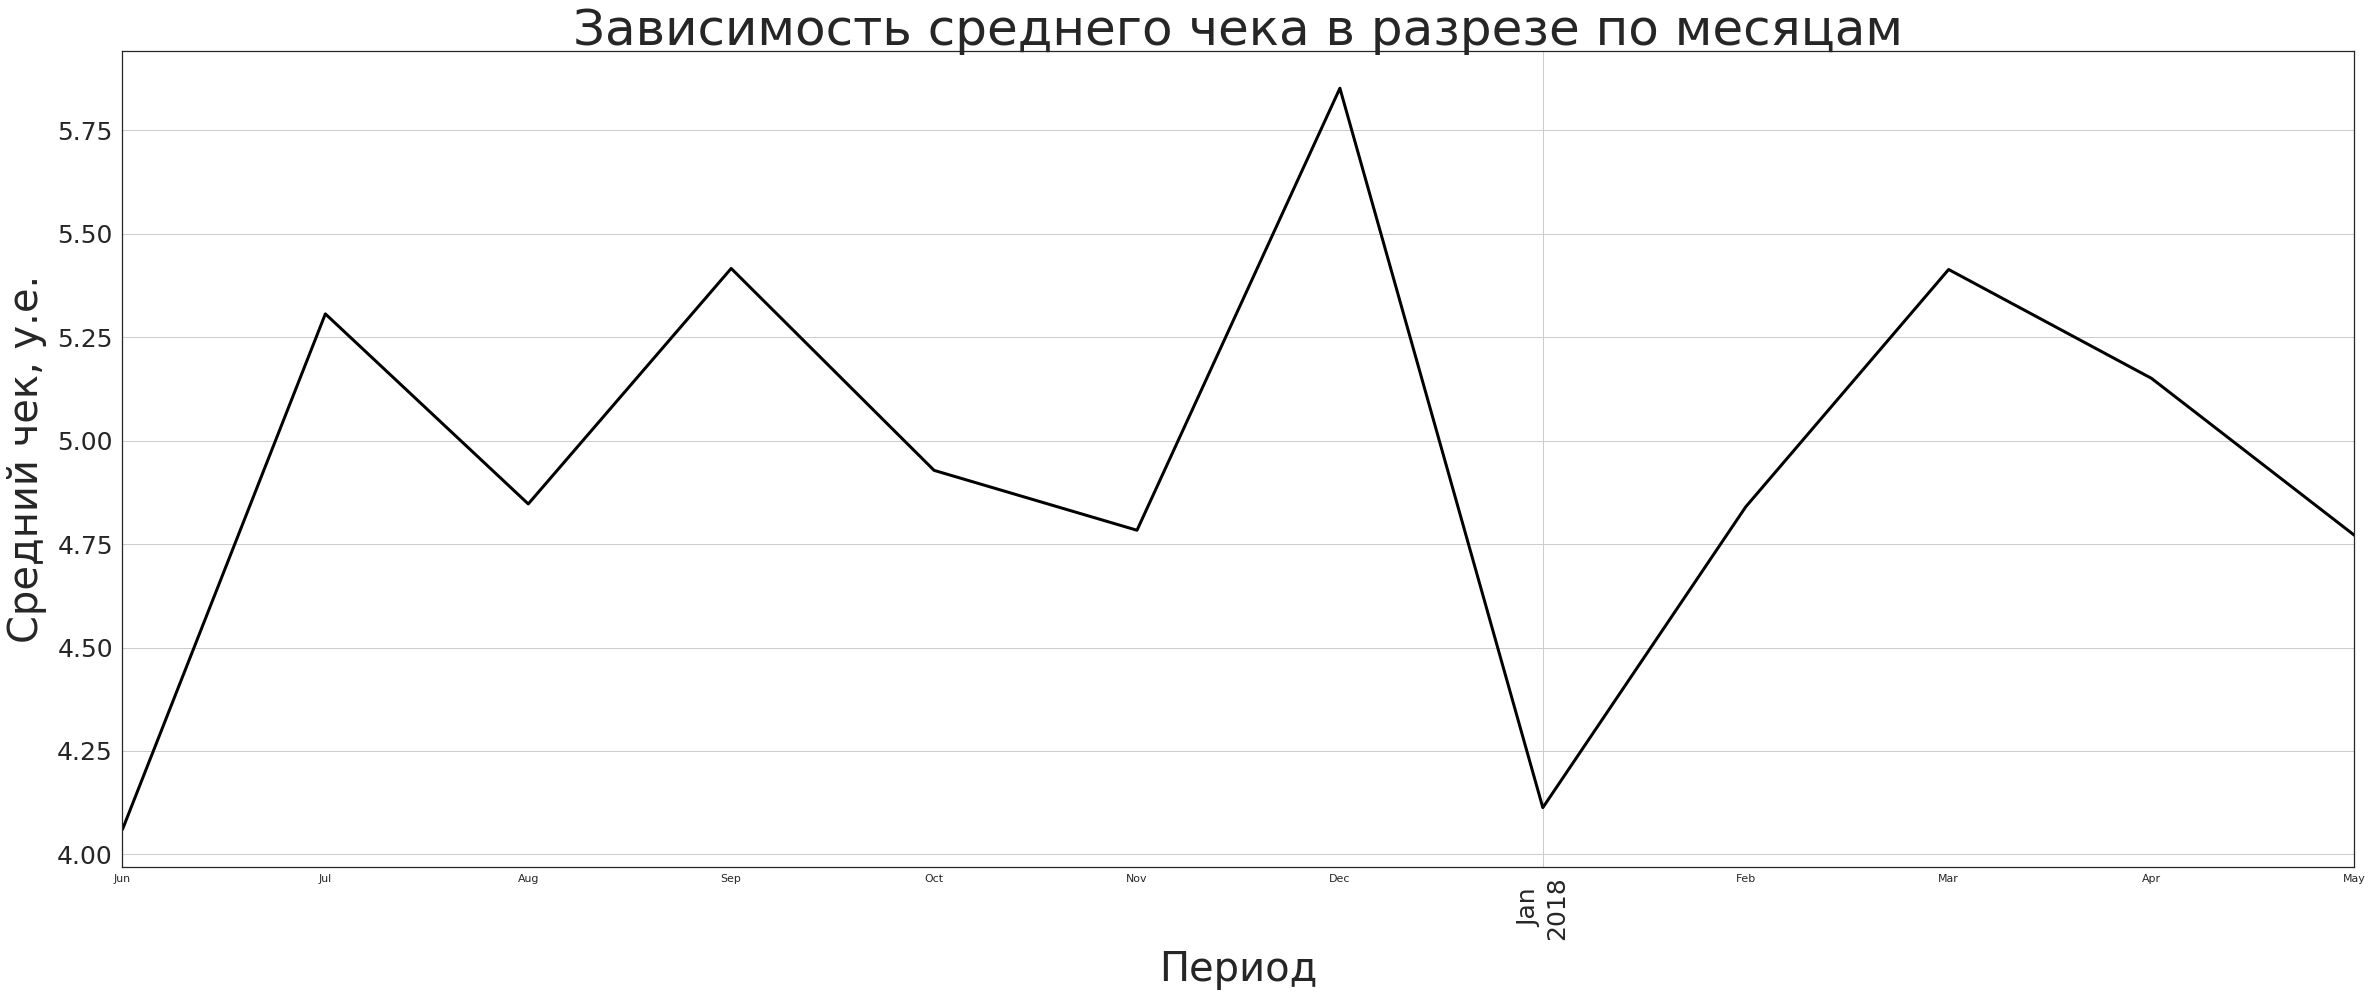

In [45]:
in_time(mean_revenue, \
        'Зависимость среднего чека в разрезе по месяцам',\
        "Средний чек, у.е.")

График ведет себя характерным образом, как и по кол-ву посещений. То есть в зимние месяцы средний чек больше (это либо кол-во покупок больше, либо более дорогие покупки) 

но так как кол-во посещений больше, то скорре всего это связано с больши количеством покупок в осенне-изимне-весенний период.
а вот летом чек уменьшается ввиду меньшего кол-ва покупок. Обычно летом люди отдыхают, путешествуют, а вот зимними вечерами ходят куда-либо развлекаться.

In [46]:
cohorts_ltv = (
    orders_mean_buy.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)


report = pd.merge(cohort_sizes_mean_buy, cohorts_ltv, on='first_order_month')

Выясним, как меняется LTV на покупателя по когортам. 

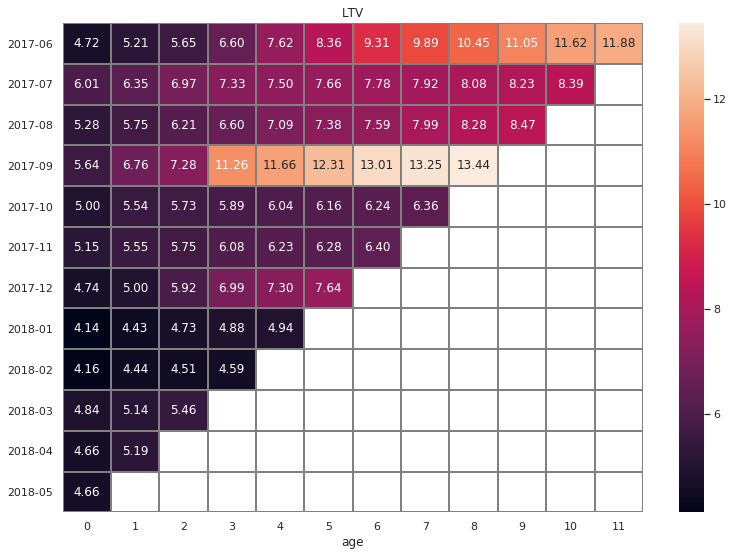

In [47]:
margin_rate = 1

#валовая прибыль
report['gp'] = report['revenue'] * margin_rate

report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

output_ltv = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
output_ltv.index=output_ltv.index.strftime("%Y-%m")
output_ltv

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output_ltv.cumsum(axis=1), annot=True,  fmt='.2f', linewidths=1, linecolor='gray') 
plt.show()

что LTV — накопительная метрика, поэтому используем cumsum(axis=1) по столбцам. Видно что уже в первый месяц валовая прибыль на каждого чеовека в когортах составляет 4,8-5 у.е. и растет с каждым месяцем. К примеру за год для первой когорты LTV вырос почти в три раза.

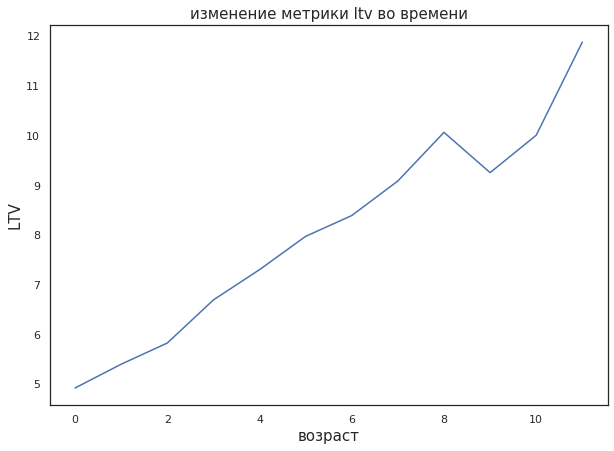

In [48]:
plt.figure(figsize=(10,7))
plt.plot(output_ltv.cumsum(axis=1).mean(axis = 0))
plt.title('изменение метрики ltv во времени', fontsize=15)
plt.ylabel('LTV', fontsize=15)
plt.xlabel('возраст', fontsize=15)

plt.show()

График показывает как растет показатель LTV по месяцам жизни в течение года. Вообще график должен все время увеличиваться но это было бы если мы строили для одной когорты, а вот этот спад на графике объясняеся тем, что мы усредняли по возрасту. Например, в 11 возрасте  когорты 2,3, принеми куда меньше денег,  чем 1 и потому при расчете среднего за 11-й возраст появляется такой провал.

In [49]:
print('средний LTV по когортам за 6 месяцев = {}'.format(output_ltv.cumsum(axis=1)[5].mean().round(2)))

средний LTV по когортам за 6 месяцев = 7.97


В среднем каждый покупатель принес по 7,97 у.е. валовой прибыли за 6 месяцев «жизни».

In [50]:
print('средний LTV:', output_ltv.cumsum(axis=1).mean().mean().round())

средний LTV: 8.0


В среднем каждый покупатель когорт принес по 8 у.е. валовой прибыли за весь период

То есть, чтобы маркетинговые расходы окупались, привлечение одного покупателя не должно превышать 8 у.е.

### Маркетинговые метрики

* Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. 
* Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика.
* Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт. 

In [51]:
#перевод в формат даты
costs['month'] = costs['dt'].astype('datetime64[M]') 

In [52]:
total_costs = costs['costs'].sum()
print('общая сумма расходов на маркетинг {} y.e.'.format(total_costs))

общая сумма расходов на маркетинг 329131.62 y.e.


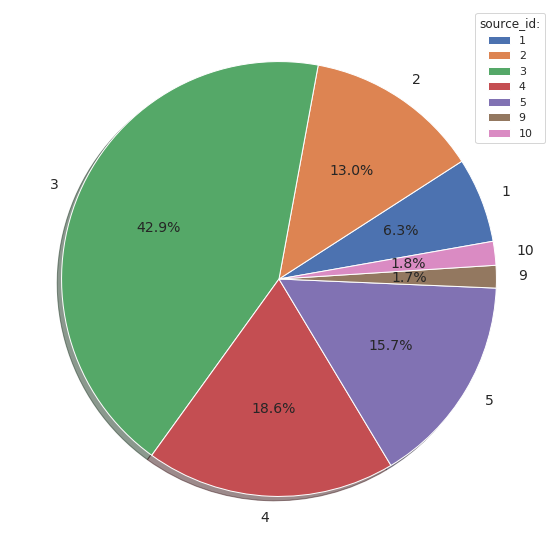

In [53]:
sources_total_costs = costs.groupby('source_id')['costs'].sum()
plt.figure(figsize = (10,10))
plt.pie(sources_total_costs, labels = sources_total_costs.index,\
        autopct='%1.1f%%', shadow=True, startangle=10, textprops = {"fontsize":14})
plt.legend(title = "source_id:")
plt.show()

из графика видно, что самые большие затраты на маркетинг занимает источник под номером 3, а далее 2,4,5.

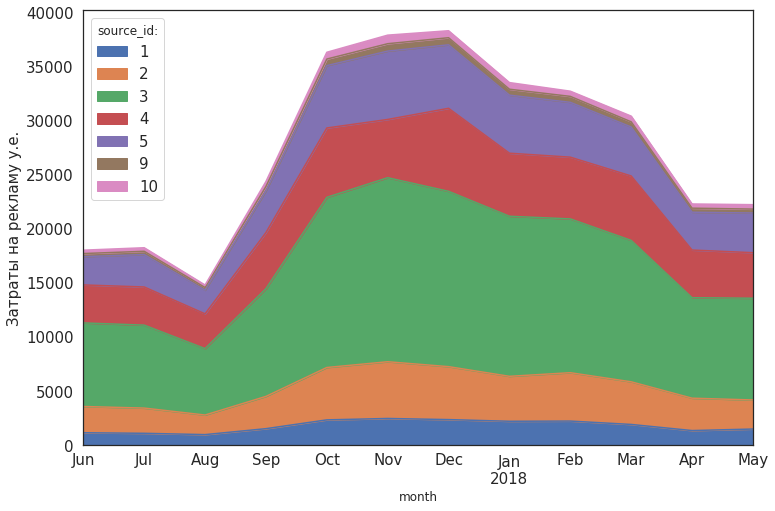

In [54]:
sources_costs = costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')

sources_costs.plot.area(figsize=(12,8), fontsize=15)
plt.ylabel('Затраты на рекламу у.е.', fontsize=15)
plt.legend(title = "source_id:", fontsize=15)
plt.show()

По данному графику видно, что маркетинговые расходы были увеличены также в осенне-зимне-весннеем периоде. А значит это также является причиной того характерного распределения посетителей вышею 
Значит на кол-во посетителей влияли не только сезонность, но и проведенные маркетинговые операции.

CAC (от англ. customer acquisition cost) — стоимость привлечения клиента. Сумма денег, во сколько обходится новый клиент компании.

In [55]:
#общий CAC
# считаем расходы за месяц
monthly_costs = costs.groupby('month')['costs'].sum()

report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

In [56]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output_cac = (report_new.pivot_table(
    index='first_order_month', columns='age', values='cac', aggfunc='mean')).round(2)
output_cac.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,8.91,8.91,8.91,8.91,8.91,8.91,8.91,8.91,8.91,8.91,8.91,8.91
2017-07-01,9.49,9.49,9.49,9.49,9.49,9.49,9.49,9.49,9.49,9.49,9.49,
2017-08-01,10.80,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,,
2017-09-01,9.44,9.44,9.44,9.44,9.44,9.44,9.44,9.44,9.44,,,
2017-10-01,8.37,8.37,8.37,8.37,8.37,8.37,8.37,8.37,,,,
2017-11-01,9.29,9.29,9.29,9.29,9.29,9.29,9.29,,,,,
2017-12-01,8.74,8.74,8.74,8.74,8.74,8.74,,,,,,
2018-01-01,9.94,9.94,9.94,9.94,9.94,,,,,,,
2018-02-01,8.96,8.96,8.96,8.96,,,,,,,,


In [57]:
print('средний CAC:', output_cac.mean(axis=1).mean().round(2))

средний CAC: 9.15


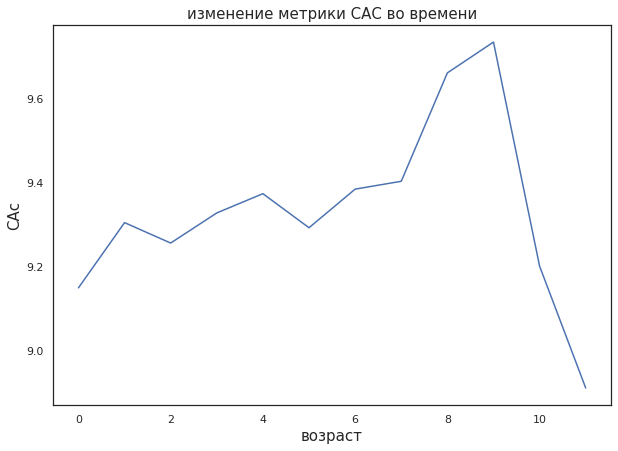

In [58]:
plt.figure(figsize=(10,7))
plt.plot(output_cac.mean(axis=0))
plt.title('изменение метрики CAC во времени', fontsize=15)
plt.ylabel('CAc', fontsize=15)
plt.xlabel('возраст', fontsize=15)

plt.show()

Привлечение одного покупателя в среднем обошлось в 9,15 у.е. Валовая прибыль с каждого из них: 8,0 у.е. 

То есть вложения в привлечение покупателей не окупились

In [59]:
#Вычисляем первый источник для юзера
sources = visits.sort_values(by='start ts').groupby('uid')['source id'].first() 


In [60]:
orders_with_sources = orders_mean_buy.join(sources, on = 'uid')
cohort_sizes_with_sources = orders_with_sources.groupby(['first_order_month', 'source id'])\
                            .agg({'uid': 'nunique'})\
                            .reset_index()
#находим кол-во людей в когортах
cohort_sizes_with_sources.columns = ['first_order_month', 'source id', 'n_buyers']

#находим и суммируем revenue
cohorts_with_sources = orders_with_sources.groupby(['first_order_month', 'order_month', 'source id'])\
                        .agg({'revenue': 'sum'}).reset_index()

#объединяем таблицы
report_with_sources = pd.merge(cohorts_with_sources, cohort_sizes_with_sources, on= ['first_order_month', 'source id'])

#валовая прибыль
report_with_sources['gp'] = report_with_sources['revenue'] * margin_rate
#Находим LTV
report_with_sources['ltv'] = report_with_sources['gp'] / report_with_sources['n_buyers']

report_with_sources['order_month'] =report_with_sources['order_month'].astype('datetime64[M]')


In [61]:
#затраты группируем по источнику+месяцу
costs = costs.rename(columns={'source_id':'source id'})
costs_with_sources = costs.groupby(['month', 'source id'])\
                            .agg({'costs': 'sum'}).reset_index()

report_with_sources = report_with_sources.\
         merge(costs_with_sources, left_on =['order_month','source id'], right_on = ['month', 'source id'])

#Находим cac
report_with_sources['cac'] = report_with_sources['costs'] / report_with_sources['n_buyers']

In [62]:
report_with_sources['romi'] = report_with_sources['ltv'] / report_with_sources['cac']

In [63]:
report_with_sources['age'] = (report_with_sources['order_month'] - report_with_sources['first_order_month'])\
                            / np.timedelta64(1, 'M')
report_with_sources['age'] = report_with_sources['age'].round().astype('int')

In [64]:
report_with_sources

,first_order_month,order_month,source id,revenue,n_buyers,gp,ltv,month,costs,cac,romi,age
0,2017-06-01,2017-06-01,1,1378.70,190,1378.70,7.256316,2017-06-01,1125.61,5.924263,1.224847,0
1,2017-06-01,2017-07-01,1,414.98,190,414.98,2.184105,2017-07-01,1072.88,5.646737,0.386791,1
2,2017-07-01,2017-07-01,1,1166.70,160,1166.70,7.291875,2017-07-01,1072.88,6.705500,1.087447,0
3,2017-06-01,2017-08-01,1,419.43,190,419.43,2.207526,2017-08-01,951.81,5.009526,0.440666,2
4,2017-07-01,2017-08-01,1,175.31,160,175.31,1.095687,2017-08-01,951.81,5.948813,0.184186,1
...,...,...,...,...,...,...,...,...,...,...,...,...
509,2017-10-01,2018-04-01,10,4.16,209,4.16,0.019904,2018-04-01,388.25,1.857656,0.010715,6
510,2017-11-01,2018-04-01,10,6.36,128,6.36,0.049687,2018-04-01,388.25,3.033203,0.016381,5
511,2018-02-01,2018-04-01,10,0.49,123,0.49,0.003984,2018-04-01,388.25,3.156504,0.001262,2
512,2018-03-01,2018-04-01,10,12.71,186,12.71,0.068333,2018-04-01,388.25,2.087366,0.032737,1


Усредним  ROMI всех когорт за каждый месяц их жизни. Например, узнаем, как быстро в среднем когорты окупаются. Усредним значения каждой колонки и «сложим» таблицу в единую строку методом mean(axis=0)

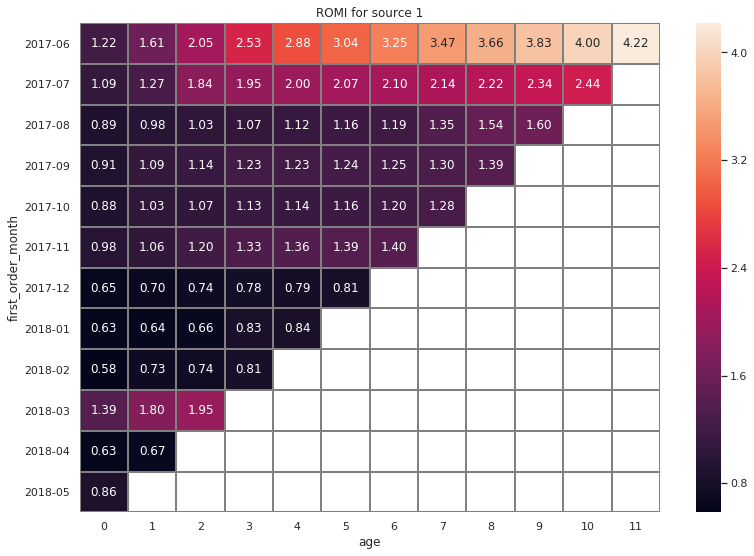

age
0     0.892768
1     1.051381
2     1.241508
3     1.295459
4     1.420043
5     1.550532
6     1.732670
7     1.908591
8     2.203143
9     2.587802
10    3.219355
11    4.217903
dtype: float64

'средний ROMI за 6 месяцев для 1 источника 1.55'

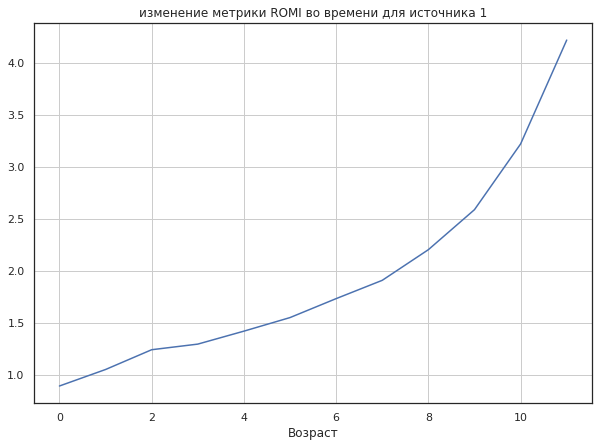

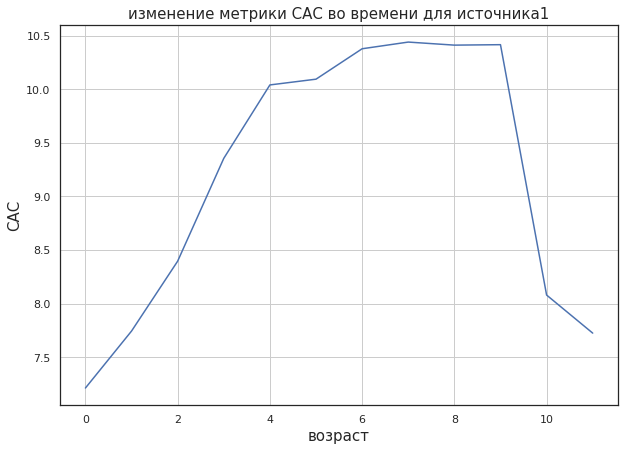

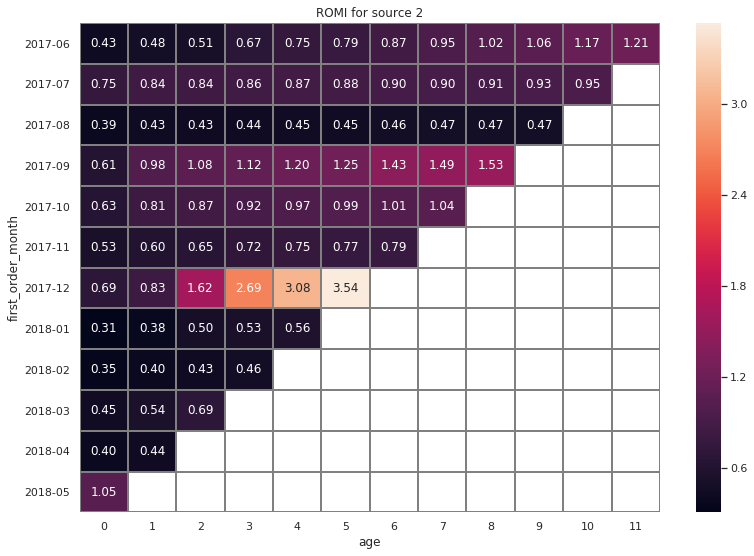

age
0     0.549286
1     0.611991
2     0.764027
3     0.933910
4     1.079093
5     1.238281
6     0.907939
7     0.971051
8     0.983521
9     0.820888
10    1.061540
11    1.207287
dtype: float64

'средний ROMI за 6 месяцев для 2 источника 1.24'

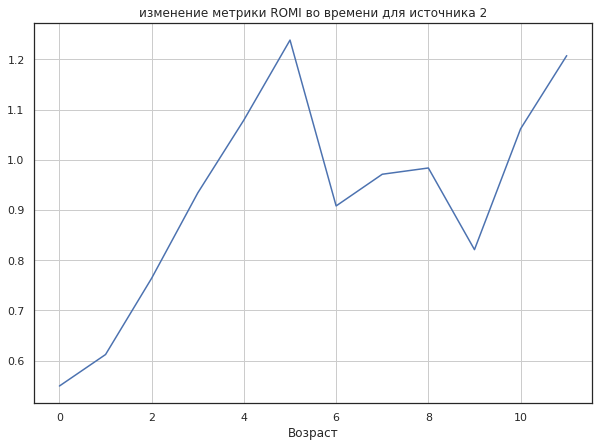

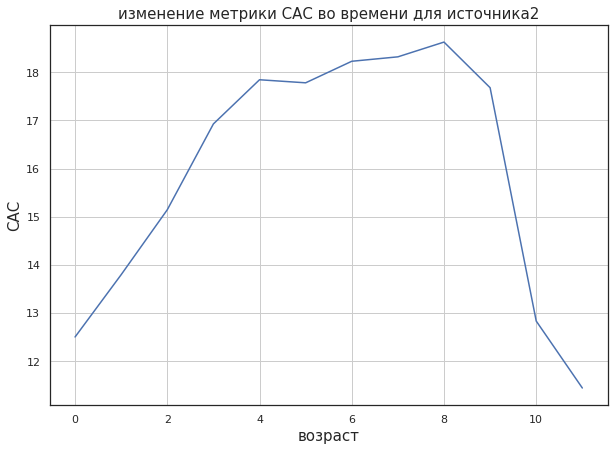

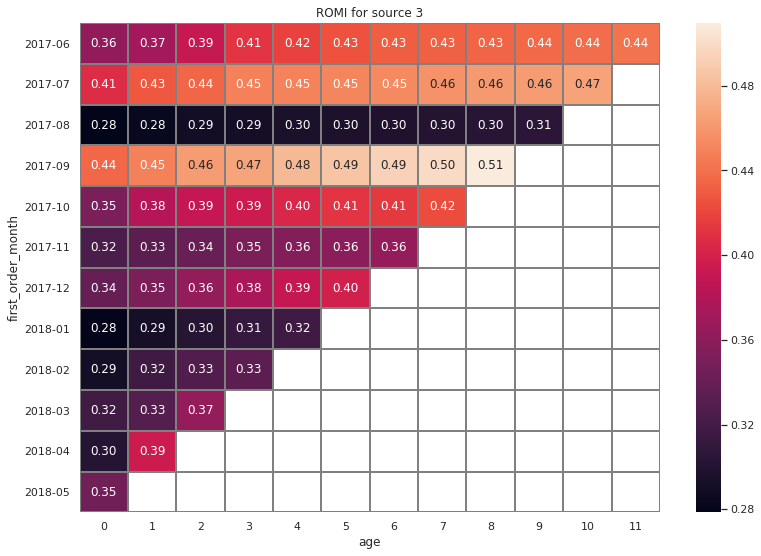

age
0     0.336151
1     0.357567
2     0.366946
3     0.376316
4     0.388788
5     0.404530
6     0.409042
7     0.422691
8     0.427205
9     0.402070
10    0.452811
11    0.441395
dtype: float64

'средний ROMI за 6 месяцев для 3 источника 0.4'

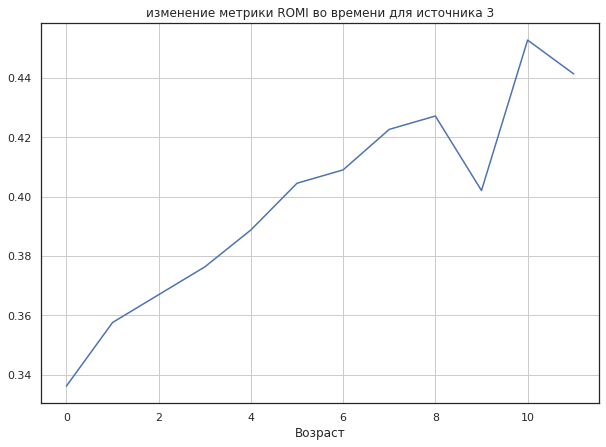

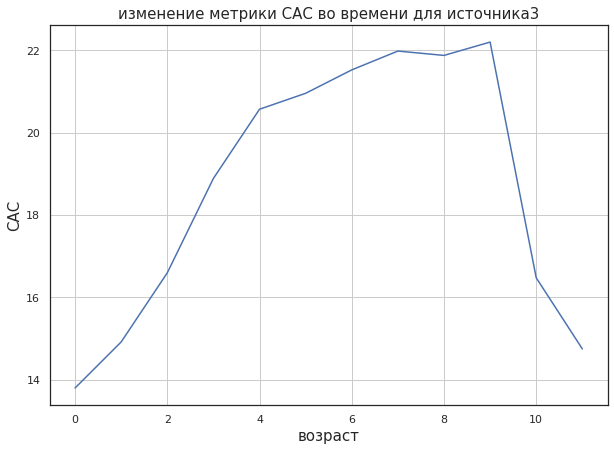

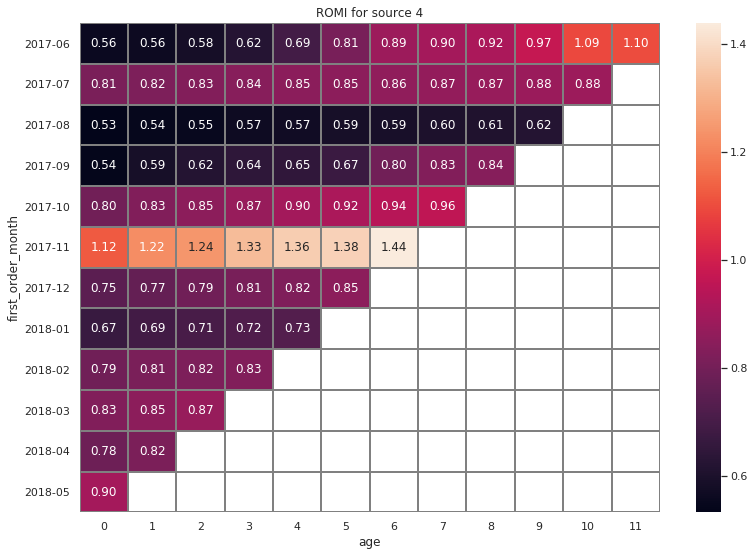

age
0     0.757409
1     0.773135
2     0.787112
3     0.803729
4     0.822516
5     0.866150
6     0.918615
7     0.831654
8     0.809336
9     0.823750
10    0.987443
11    1.100593
dtype: float64

'средний ROMI за 6 месяцев для 4 источника 0.87'

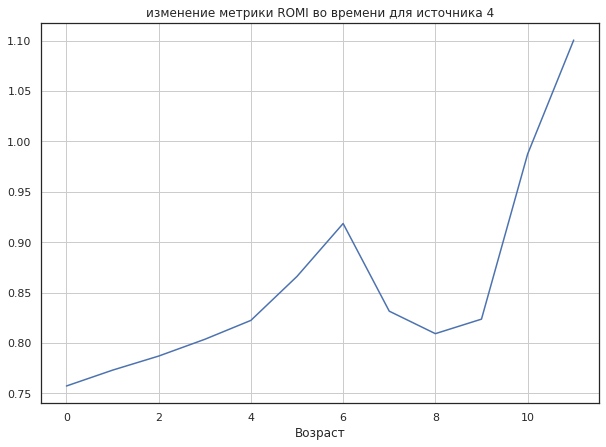

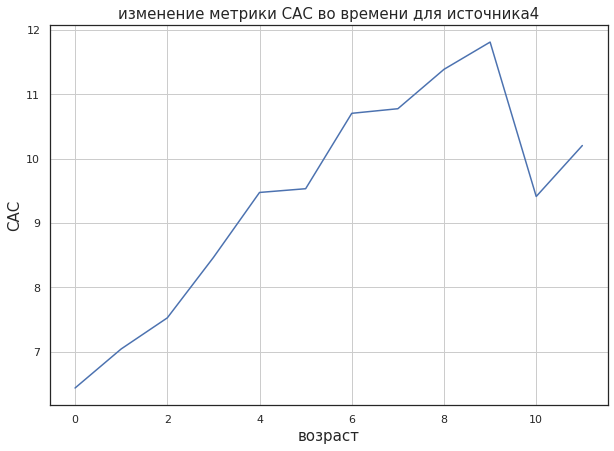

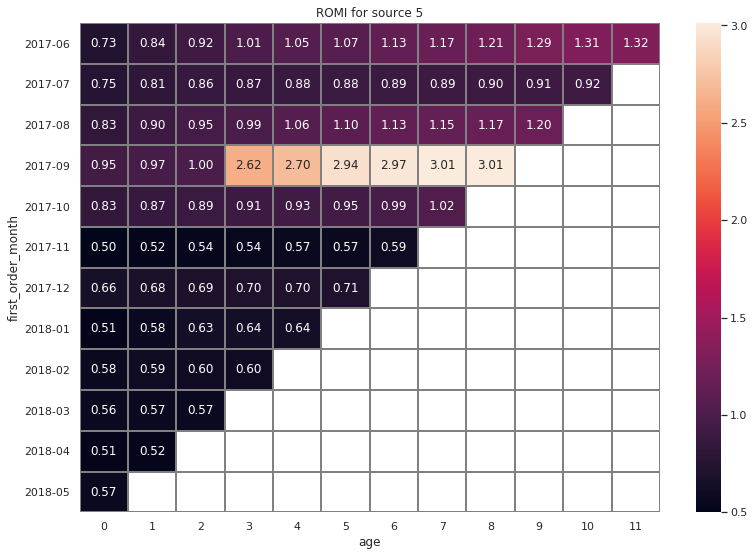

age
0     0.664923
1     0.713017
2     0.764997
3     0.986933
4     1.066591
5     1.174435
6     1.283281
7     1.448537
8     1.575150
9     1.132798
10    1.114534
11    1.322678
dtype: float64

'средний ROMI за 6 месяцев для 5 источника 1.17'

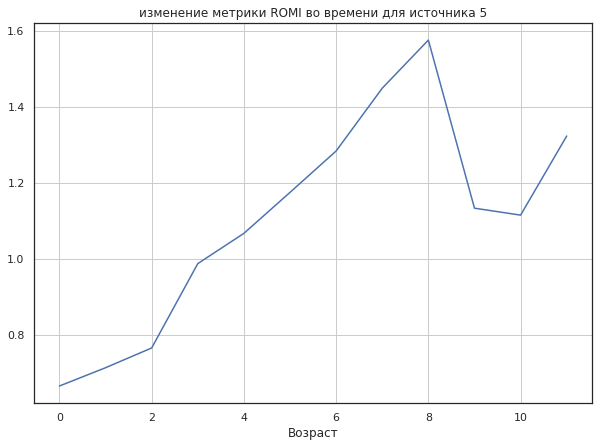

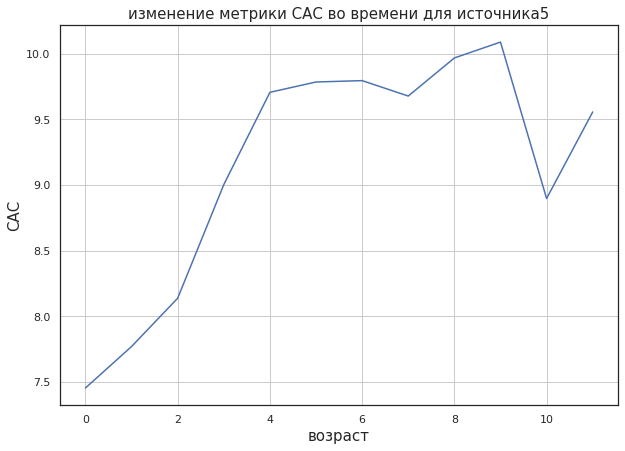

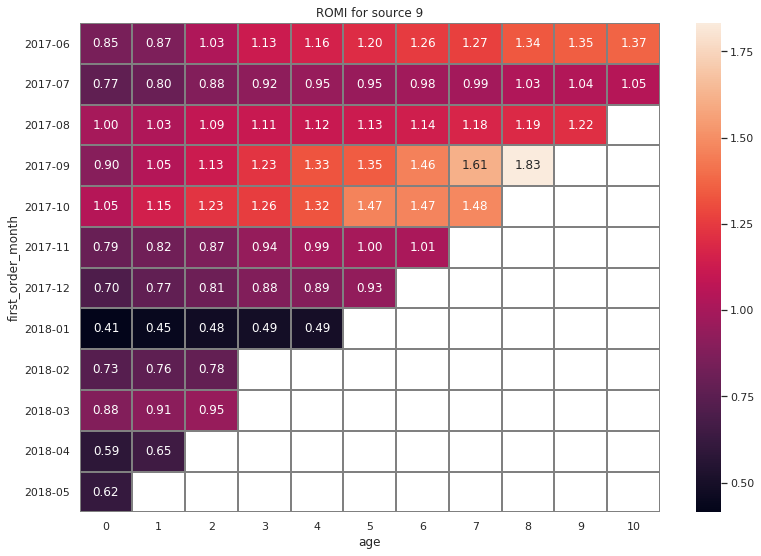

age
0     0.774013
1     0.841353
2     0.923847
3     0.994663
4     1.029923
5     1.146659
6     1.219145
7     1.305286
8     1.348288
9     1.202339
10    1.208412
dtype: float64

'средний ROMI за 6 месяцев для 9 источника 1.15'

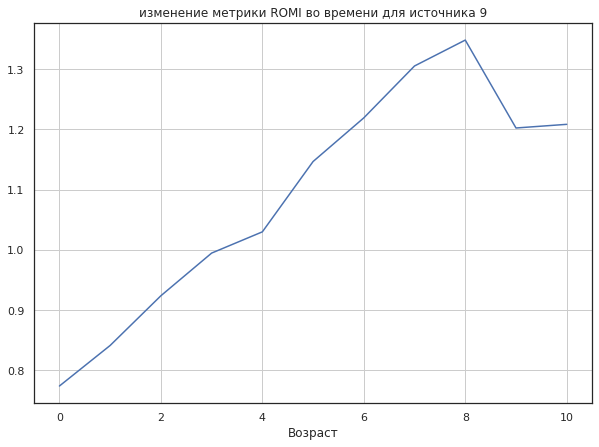

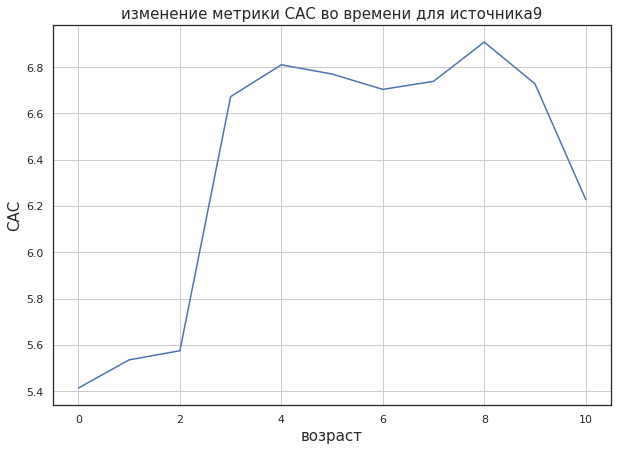

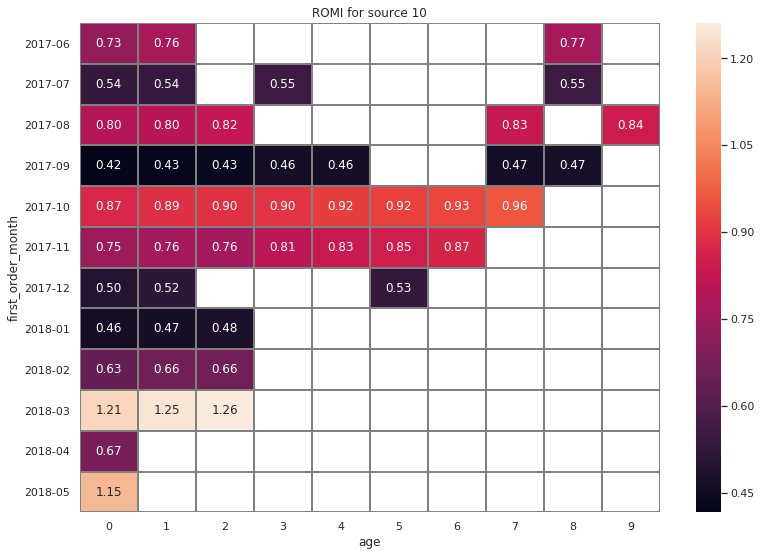

age
0    0.727377
1    0.707722
2    0.759631
3    0.681901
4    0.739811
5    0.768386
6    0.901628
7    0.753354
8    0.597275
9    0.840419
dtype: float64

'средний ROMI за 6 месяцев для 10 источника 0.77'

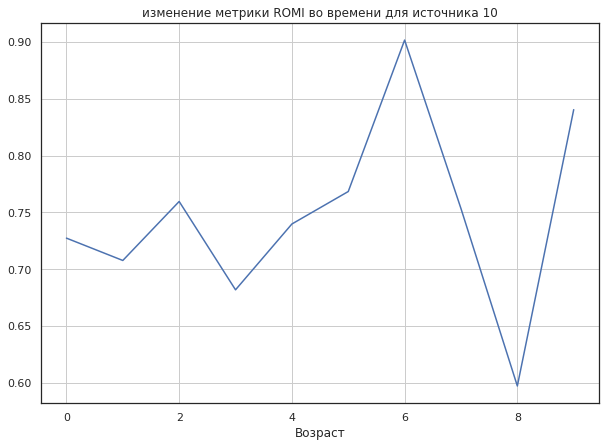

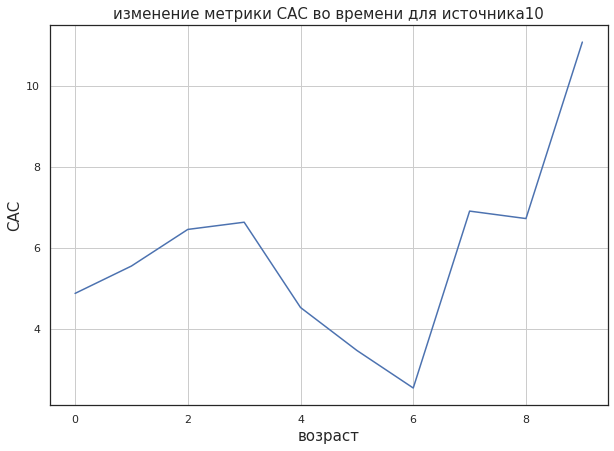

In [65]:
#построим тепловые карты и распределения по времени метрики
for i in report_with_sources['source id'].unique():
    report_with_sources[report_with_sources['source id'] == i]\
    .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
   
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('ROMI for source {}'.format(i))
    sns.heatmap(report_with_sources[report_with_sources['source id'] == i]\
                .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                .cumsum(axis=1), annot=True,  fmt='.2f', linewidths=1, linecolor='gray', 
                yticklabels=report_with_sources[report_with_sources['source id'] == i]\
                .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                .cumsum(axis=1).index.strftime("%Y-%m")) 
    
    plt.show()
    
    display(report_with_sources[report_with_sources['source id'] == i]\
                .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                 .cumsum(axis = 1).mean(axis = 0))
    display('средний ROMI за 6 месяцев для {} источника {}'.format(i, \
                 report_with_sources[report_with_sources['source id'] == i]\
                .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                 .cumsum(axis = 1)[5].mean(axis = 0).round(2)))
    plt.figure(figsize=(10, 7))
    plt.plot(report_with_sources[report_with_sources['source id'] == i]\
                .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                 .cumsum(axis = 1).mean(axis = 0))
    plt.title(label='изменение метрики ROMI во времени для источника {}'.format(i))
    plt.grid(True)
    plt.xlabel('Возраст')
    
    plt.figure(figsize=(10,7))
    plt.plot((report_with_sources[report_with_sources['source id'] == i]\
              .pivot_table(index='first_order_month',\
              columns='age', values='cac', aggfunc='mean')).mean(axis=0))
    plt.title('изменение метрики CAC во времени для источника{}'.format(i), fontsize=15)
    plt.grid(True)
    plt.ylabel('CAC', fontsize=15)
    plt.xlabel('возраст', fontsize=15)
    #plt.уlabel('ROMI')
   

посмотрев на тепловые карты и усредненные значения ROMI мво взрастам можно сделать выводы в течение какого времени окупается те или иные маркетинговые расходы по источникам. Расходы считаются окуплеными если ROMI становится = или больше 1. 
Посмотрим и выявим источники, которые окупились и приносят прибыль, и те которые не окупились и пошли в убыток за год (на которые лучше не тратить деньги). 
Выводы будут прописаны ниже.

P.S. ROMI накопительная величина, но на графиках ведет себя не как накопительная, все ввиду осреденеия по возрастам когорт.

## Шаг 3. Выводы и рекомендации

При определении источников стоит обратить внимание на ROMI, который учитывает окупаемость маркетинговых расходов и состоит из LTV и CAC. Таким образом будем опираться на это значение.
 1,2,4,5,9  источники окупились, остальные нет. Значит основной упор нужно делать на данные источники. 
 Но самыми наилучишими среди них являются:
 - 1 источник, который окупился на 2 месяц жизни
 - 5,9 источники, которые окупились на на 5 месяц жизни.
 
 То есть пользователи, пришедшие с данных источников принесли Афише больше валовой прибыли, чем было потрачено на маркетинг по привлеению клиентовю
 Эти же источники являются не самыми дорогими, и поэтому стоит вкладыываться в эти источники, **а именно 1,5,9**, так как они эффективны.

остальные же источники не окупились, либо окупились тлько к концу года. Поэтому на источники 2,4, 3, 10 не стоит тратить деньги

**Прдуковые метрики**
- Кол-во уникальных пользователей в день составляет 908 чел, в неделю - 5716 чел, в месяц - 23228 чел.
- В среднем кол-во посещений пользователеями сайта Афиша составляет 1 раз/день
- можно пронаблюдать сезонность в посещении сайта Афиша: в зимний период кол-во посетителей гораздо больше, чем в летний период.
- посещение в начале недели также больше, чем на выходных.
- типичная пользовательская сессия 60 с.
- коэффициент удержания резко снижается по сравнению в первым месяцем. необходимы меры по удержанию клиентов. За 10 мес. коэффициент удержания упал на 3,1%. 
**Метрики электронной коммерции**
- Самое большое кол-во пользовтелей совершают покупку в течение первого дня (0 день).
- Среднее количество покупок на одного покупателя за 6 месяцев = 13, то есть по 2 покупки в месяц примерно.
- Средний чек на одного покупателя 4,84 у.е /мес
- В среднем каждый покупатель когорт принес по 8 у.е. валовой прибыли за весь период
**Метрики электронной коммерции**
- бщая сумма расходов на маркетинг 329131.62 y.e.
- самые большие затраты на маркетинг занимает источник под номером 3, а далее 2,4,5.
- Привлечение одного покупателя в среднем обошлось в 9,15 у.е. Валовая прибыль с каждого из них: 8,0 у.е.То есть вложения в привлечение покупателей не окупились
- самые лучшие источниками по окупаемости являются 1,5,9  (по сути это не самые дорогие источники согасно пункту 2)


- По коэффицинту привлечения клиентов самыми перспектиными являются когорты июньская 2017, сентябрьские 2017.
- по прибыли самыми перспектиными являются также  когорты июньская 2017, сентябрьские 2017.

таким образом, самыми перспективными являются июньская 2017, сентябрьские 2017, на которые стоит обратить внимание и удержать число клиентами 